### LSTM & GRU Example

Reference [Jon Krohn](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/vanilla_lstm_in_keras.ipynb)

This notebook classfies IMDB movie reviews using a simple LSTM and then  GRU model

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import LSTM # new!
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Load Data

In [2]:
# vector-space embedding:
n_dim = 64
n_unique_words = 10000
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2


In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

17464789/17464789 [==============================] - 0s 0us/step


Preprocess Data

In [4]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

Set hyperparameters

In [5]:
# output directory name:
#output_dir = 'model_output/vanillaLSTM'

# training:
epochs = 8
batch_size = 128

# LSTM layer architecture:
n_lstm = 256
drop_lstm = 0.2

# dense layer architecture:
# n_dense = 256
# dropout = 0.2

Build Model

In [6]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm, dropout=drop_lstm)) # here is the new layer here!
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 64)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 968961 (3.70 MB)
Trainable params: 968961 (3.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile Model

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
output_dir = 'weights_LSTM'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a ModelCheckpoint callback to save weights after each epoch
modelcheckpoint = ModelCheckpoint(filepath=output_dir + "/weights.{epoch:02d}.keras", save_weights_only=True)


Train the model

In [10]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/8
196/196 [==============================] - 42s 185ms/step - loss: 0.5088 - accuracy: 0.7329 - val_loss: 0.3430 - val_accuracy: 0.8511
Epoch 2/8
196/196 [==============================] - 12s 62ms/step - loss: 0.2914 - accuracy: 0.8808 - val_loss: 0.3411 - val_accuracy: 0.8538
Epoch 3/8
196/196 [==============================] - 10s 48ms/step - loss: 0.2395 - accuracy: 0.9063 - val_loss: 0.3574 - val_accuracy: 0.8492
Epoch 4/8
196/196 [==============================] - 7s 35ms/step - loss: 0.2001 - accuracy: 0.9240 - val_loss: 0.3794 - val_accuracy: 0.8452
Epoch 5/8
196/196 [==============================] - 6s 28ms/step - loss: 0.1661 - accuracy: 0.9396 - val_loss: 0.4082 - val_accuracy: 0.8437
Epoch 6/8
196/196 [==============================] - 6s 29ms/step - loss: 0.1389 - accuracy: 0.9500 - val_loss: 0.4768 - val_accuracy: 0.8344
Epoch 7/8
196/196 [==============================] - 6s 30ms/step - loss: 0.1139 - accuracy: 0.9601 - val_loss: 0.6230 - val_accuracy: 0.8298
Ep

Evaluate

In [11]:
# try changing the epoch references and monitor the % ROC

model.load_weights(output_dir+"/weights.03.keras")

In [12]:
y_hat = model.predict(x_valid)

782/782 [==============================] - 3s 3ms/step


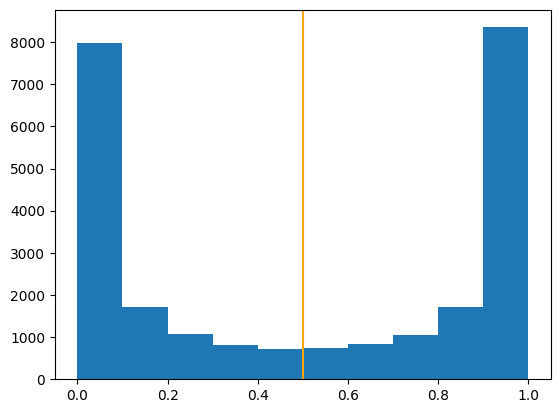

In [13]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

# model conviction will show greater count at 1 or 0

In [14]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.70'

### Gated Recurrent Units

This example we classify IMDB reviews with GRU

In [15]:
from keras.layers import GRU

Se Hyperparameters

In [16]:
# output directory name:
output_dir = 'weights_GRU'

# training:
epochs = 20
batch_size = 128

# GRU layer architecture:
n_gru = 256
drop_gru = 0.2

# dense layer architecture:
# n_dense = 256
# dropout = 0.2

In [17]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(GRU(n_gru, dropout=drop_gru)) # here is the new layer here!
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 100, 64)           0         
 alDropout1D)                                                    
                                                                 
 gru (GRU)                   (None, 256)               247296    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 887553 (3.39 MB)
Trainable params: 887553 (3.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.keras")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [21]:
# GRU will generally train faster than LSTM (slightly less parameters)

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/20
196/196 [==============================] - 20s 89ms/step - loss: 0.5505 - accuracy: 0.7036 - val_loss: 0.3889 - val_accuracy: 0.8252
Epoch 2/20
196/196 [==============================] - 10s 49ms/step - loss: 0.3133 - accuracy: 0.8712 - val_loss: 0.3556 - val_accuracy: 0.8439
Epoch 3/20
196/196 [==============================] - 6s 30ms/step - loss: 0.2422 - accuracy: 0.9036 - val_loss: 0.3712 - val_accuracy: 0.8392
Epoch 4/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1974 - accuracy: 0.9239 - val_loss: 0.4124 - val_accuracy: 0.8389
Epoch 5/20
196/196 [==============================] - 6s 29ms/step - loss: 0.1610 - accuracy: 0.9400 - val_loss: 0.3938 - val_accuracy: 0.8397
Epoch 6/20
196/196 [==============================] - 5s 27ms/step - loss: 0.1255 - accuracy: 0.9542 - val_loss: 0.4650 - val_accuracy: 0.8388
Epoch 7/20
196/196 [==============================] - 4s 23ms/step - loss: 0.0987 - accuracy: 0.9653 - val_loss: 0.5240 - val_accuracy: 0.83

In [22]:
# try changing the epoch references and monitor the % ROC

model.load_weights(output_dir+"/weights.01.keras")

In [24]:
# Predict probabilities
y_hat = model.predict(x_valid)

# Print or use y_hat as needed
print(y_hat)

782/782 [==============================] - 3s 4ms/step
[[0.62329435]
 [0.970243  ]
 [0.8077069 ]
 ...
 [0.3408063 ]
 [0.07052838]
 [0.86371356]]


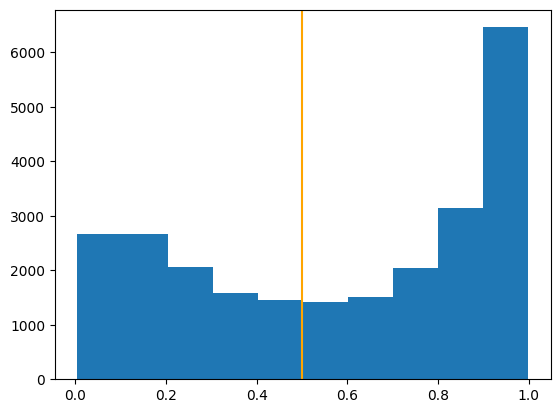

In [25]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')


In [26]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.02'